#Quienes somos:


*   Sergio David Mesa Buitrago
*   Daniel Sebastian Perez Hernandez
*   Oscar Neira
*   Cristian Solano
*   Julian Escobar



---



---
Origen de la data:
https://www.datos.gov.co/xxxxxxxxx




#P0. importar librerias (5%)

##P0.1 librerias genericas

In [115]:
!pip install fsspec
!pip install beautifulsoup4
!pip install wikitables


##P0.2 librerias para Machine learning

In [151]:
# Librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 


#Sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Others
from mpl_toolkits.mplot3d import Axes3D
import requests
from bs4 import BeautifulSoup


%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#P1. importando dataset (5%)

In [152]:
violencia_df = pd.read_csv('https://raw.githubusercontent.com/cristiansolanob/Machine-Learning/main/Conteo_de_Indiciados.csv')
violencia_df.head(10)   #imprimimos las primeras 10 filas

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,CAPTURA,SEXO_INDICIADO,GRUPO_EDAD_INDICIADO,PAIS_NACIMIENTO,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_INDICIADOS
0,SI,NO,NO,INACTIVO,INDAGACIÓN,2017.0,2017.0,2017.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,SIN DATO,Colombia,NO,35
1,NO,NO,NO,INACTIVO,INDAGACIÓN,2011.0,2011.0,2011.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,FEMENINO,ADULTO MAYOR DE 60,Colombia,NO,1
2,NO,NO,NO,INACTIVO,INDAGACIÓN,2016.0,2016.0,2012.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,FEMENINO,SIN DATO,Colombia,NO,19
3,SI,NO,NO,INACTIVO,INDAGACIÓN,2012.0,2012.0,2012.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADOLESCENTE 14 - 17,NaN,NO,3
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2012.0,2012.0,2012.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,409
5,SI,NO,NO,INACTIVO,INDAGACIÓN,2014.0,2014.0,2014.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,SIN DATO,Colombia,NO,3
6,NO,NO,NO,INACTIVO,INDAGACIÓN,2017.0,2017.0,2017.0,Ley 906,Colombia,...,NO,NO,SI,NO,NO,FEMENINO,JUVENTUD 18 - 28,Colombia,NO,1
7,SI,NO,NO,INACTIVO,QUERELLABLE,2010.0,2010.0,2010.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,55
8,SI,NO,NO,INACTIVO,INDAGACIÓN,2011.0,2011.0,2011.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTEZ 29 - 59,Colombia,NO,42
9,SI,NO,NO,INACTIVO,INDAGACIÓN,2016.0,2016.0,2016.0,Ley 906,Colombia,...,NO,NO,NO,NO,NO,FEMENINO,ADULTO MAYOR DE 60,Colombia,NO,1


In [153]:
violencia_df.info()
#violencia_df.shape
#violencia_df.describe()
#violencia_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83160 entries, 0 to 83159
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HECHO                       83160 non-null  object 
 1   RUPTURA                     83160 non-null  object 
 2   CONEXO                      83160 non-null  object 
 3   ESTADO_NOTICIA              83160 non-null  object 
 4   ETAPA                       83160 non-null  object 
 5   ANIO_DENUNCIA               83160 non-null  float64
 6   ANIO_ENTRADA                83160 non-null  float64
 7   ANIO_HECHO                  83160 non-null  float64
 8   LEY                         83160 non-null  object 
 9   PAIS                        83160 non-null  object 
 10  DEPARTAMENTO                83160 non-null  object 
 11  MUNICIPIO                   83160 non-null  object 
 12  SECCIONAL                   82753 non-null  object 
 13  GRUPO_DELITO                831

#P2.Conociendo y normalizando los datos (30%)


###P2.0 generales (10%)

---
*   dimensiones del dataframe
*   existen columnas con nulos?
*   todos las columnas son númericos?
*   existen valores negativos?...si existen que hacemos con ellos?


In [154]:
#violencia_df.info()
#violencia_df.shape
#violencia_df.describe()
violencia_df.isnull().sum()

HECHO                            0
RUPTURA                          0
CONEXO                           0
ESTADO_NOTICIA                   0
ETAPA                            0
ANIO_DENUNCIA                    0
ANIO_ENTRADA                     0
ANIO_HECHO                       0
LEY                              0
PAIS                             0
DEPARTAMENTO                     0
MUNICIPIO                        0
SECCIONAL                      407
GRUPO_DELITO                     0
DELITO                           0
IMPUTACION                       0
CONDENA                          0
ATIPICIDAD_INEXISTENCIA          0
ACUSACION                        0
CAPTURA                          0
SEXO_INDICIADO                   0
GRUPO_EDAD_INDICIADO             0
PAIS_NACIMIENTO               6962
HOMICIDIO_DOLOSO_CONSUMADO       0
TOTAL_INDICIADOS                 0
dtype: int64

Eliminamos Campos nulos 


83160 Tamaño del dataframe.
los campos **Seccional** y **Pais Nacimiento** --->contiene datos nulos
Solo tres campos sion numericos el resto tipo de object 
 


In [155]:
violencia_df["SECCIONAL"] = violencia_df["SECCIONAL"].fillna(0)
violencia_df["PAIS_NACIMIENTO"] = violencia_df["PAIS_NACIMIENTO"].fillna(0)

In [156]:
violencia_df.head()
violencia_df.isnull().sum()

HECHO                         0
RUPTURA                       0
CONEXO                        0
ESTADO_NOTICIA                0
ETAPA                         0
ANIO_DENUNCIA                 0
ANIO_ENTRADA                  0
ANIO_HECHO                    0
LEY                           0
PAIS                          0
DEPARTAMENTO                  0
MUNICIPIO                     0
SECCIONAL                     0
GRUPO_DELITO                  0
DELITO                        0
IMPUTACION                    0
CONDENA                       0
ATIPICIDAD_INEXISTENCIA       0
ACUSACION                     0
CAPTURA                       0
SEXO_INDICIADO                0
GRUPO_EDAD_INDICIADO          0
PAIS_NACIMIENTO               0
HOMICIDIO_DOLOSO_CONSUMADO    0
TOTAL_INDICIADOS              0
dtype: int64

In [149]:
violencia_df = violencia_df.dropna()
violencia_df = violencia_df.reset_index(drop=True)

##P2.1 Normalizando los datos (50%)

###P2.1.1 Convertir datos object (Categoricos o Text) en Data Numerica/DateTime

In [157]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()


Convertimos datos Object a actegoricos 

In [158]:
uniqueValues = violencia_df['SECCIONAL'].unique()
print(uniqueValues)

['DIRECCIÓN SECCIONAL DE MEDELLÍN' 'DIRECCIÓN SECCIONAL DE CALI'
 'DIRECCIÓN SECCIONAL DE BOGOTÁ' 'DIRECCIÓN SECCIONAL DE CÓRDOBA'
 'DIRECCIÓN SECCIONAL DE TOLIMA' 'DIRECCIÓN SECCIONAL DE CUNDINAMARCA'
 'DIRECCIÓN SECCIONAL DE SANTANDER' 'DIRECCIÓN SECCIONAL DE META'
 'DIRECCIÓN SECCIONAL DE QUINDÍO' 'DIRECCIÓN SECCIONAL DE PUTUMAYO'
 'DIRECCIÓN SECCIONAL DE MAGDALENA MEDIO'
 'DIRECCIÓN SECCIONAL DE VALLE DEL CAUCA'
 'DIRECCIÓN SECCIONAL DE ANTIOQUIA' 'DIRECCIÓN SECCIONAL DE CASANARE'
 'DIRECCIÓN SECCIONAL DE ATLÁNTICO' 'DIRECCIÓN SECCIONAL DE BOYACÁ'
 'DIRECCIÓN SECCIONAL DE NARIÑO' 'DIRECCIÓN SECCIONAL DE MAGDALENA'
 'DIRECCIÓN SECCIONAL DE NORTE DE SANTANDER'
 'DIRECCIÓN SECCIONAL DE CAUCA' 'DIRECCIÓN SECCIONAL DE AMAZONAS'
 'DIRECCIÓN SECCIONAL DE BOLÍVAR' 'DIRECCIÓN SECCIONAL DE CALDAS'
 'DIRECCIÓN SECCIONAL DE HUILA' 'DIRECCIÓN SECCIONAL DE RISARALDA'
 'DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES CRIMINALES' 0
 'DIRECCIÓN SECCIONAL DE GUAVIARE' 'DIRECCIÓN SECCIONAL DE CESAR'
 '

In [161]:
violencia_df['HECHO']=le.fit_transform(violencia_df['HECHO'])  # (version rapida)
violencia_df['RUPTURA']=le.fit_transform(violencia_df['RUPTURA']) 
violencia_df['CONEXO']=le.fit_transform(violencia_df['CONEXO']) 
violencia_df['ESTADO_NOTICIA']=le.fit_transform(violencia_df['ESTADO_NOTICIA']) 
violencia_df['ETAPA']=le.fit_transform(violencia_df['ETAPA']) 
violencia_df['LEY']=le.fit_transform(violencia_df['LEY']) 
violencia_df['PAIS']=le.fit_transform(violencia_df['PAIS'])
violencia_df['DEPARTAMENTO']=le.fit_transform(violencia_df['DEPARTAMENTO']) 
violencia_df['MUNICIPIO']=le.fit_transform(violencia_df['MUNICIPIO'])
violencia_df['SECCIONAL']=le.fit_transform(violencia_df['SECCIONAL'].apply(str))
violencia_df['GRUPO_DELITO']=le.fit_transform(violencia_df['GRUPO_DELITO'])
violencia_df['DELITO']=le.fit_transform(violencia_df['DELITO'])
violencia_df['IMPUTACION']=le.fit_transform(violencia_df['IMPUTACION']) 
violencia_df['CONDENA']=le.fit_transform(violencia_df['CONDENA']) 
violencia_df['ATIPICIDAD_INEXISTENCIA']=le.fit_transform(violencia_df['ATIPICIDAD_INEXISTENCIA']) 
violencia_df['ACUSACION']=le.fit_transform(violencia_df['ACUSACION'])
violencia_df['CAPTURA']=le.fit_transform(violencia_df['CAPTURA'])
violencia_df['SEXO_INDICIADO']=le.fit_transform(violencia_df['SEXO_INDICIADO'])
violencia_df['GRUPO_EDAD_INDICIADO']=le.fit_transform(violencia_df['GRUPO_EDAD_INDICIADO'])
violencia_df['PAIS_NACIMIENTO']=le.fit_transform(violencia_df['PAIS_NACIMIENTO'].apply(str))
violencia_df['HOMICIDIO_DOLOSO_CONSUMADO']=le.fit_transform(violencia_df['HOMICIDIO_DOLOSO_CONSUMADO'])
violencia_df['TOTAL_INDICIADOS']=le.fit_transform(violencia_df['TOTAL_INDICIADOS']) 


In [147]:
violencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83160 entries, 0 to 83159
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HECHO                       83160 non-null  int64  
 1   RUPTURA                     83160 non-null  int64  
 2   CONEXO                      83160 non-null  int64  
 3   ESTADO_NOTICIA              83160 non-null  int64  
 4   ETAPA                       83160 non-null  int64  
 5   ANIO_DENUNCIA               83160 non-null  float64
 6   ANIO_ENTRADA                83160 non-null  float64
 7   ANIO_HECHO                  83160 non-null  float64
 8   LEY                         83160 non-null  int64  
 9   PAIS                        83160 non-null  int64  
 10  DEPARTAMENTO                83160 non-null  int64  
 11  MUNICIPIO                   83160 non-null  int64  
 12  SECCIONAL                   83160 non-null  int64  
 13  GRUPO_DELITO                831

###P2.1.2 normalizar todos los datos numericos entre [0, 1].

AGREGAMOS IDENTIFICADORES A LAS COLUMNAS 

In [162]:
min_max_scaler = preprocessing.MinMaxScaler() 
violencia_escalado = min_max_scaler.fit_transform(violencia_df)
violencia_escalado = pd.DataFrame(violencia_df) # Hay que convertir a DF el resultado.
violencia_escalado = violencia_df.rename(columns = {0:'HECHO ',1:'RUPTURA ',2:'CONEXO ',3:'ESTADO_NOTICIA ',4:'ETAPA ', 5: 'ANIO_DENUNCIA', 6:'ANIO_ENTRADA',7:'ANIO_HECHO ',8:'LEY',9:'PAIS',10:'DEPARTAMENTO',11:'MUNICIPIO',12:'SECCIONAL',13:'GRUPO_DELITO',14:'DELITO ',15:'IMPUTACION',16:'CONDENA',17:'ATIPICIDAD_INEXISTENCIA',18:'ACUSACION',19:'CAPTURA',20:'SEXO_INDICIADO',21:'GRUPO_EDAD_INDICIADO',22:'PAIS_NACIMIENTO',23:'HOMICIDIO_DOLOSO_CONSUMADO',24:'TOTAL_INDICIADOS'})

###P2.1.3 exportando Data a un CSV con los arreglos (si son necesarios).

###P2.1.4 eliminar columnas que no usaremos (object) 

In [184]:
#borrar nulos o no?
violencia_df = violencia_df.dropna()
violencia_df = violencia_df.reset_index(drop=True)

In [185]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = violencia_df['HECHO'] # Guardamos la columna Date.
violencia_df = violencia_df.drop('HECHO', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


##P2.2 graficando datos (40%)

---

*   Gráficos circulares 
*   Gráfico de dispersión (k-means) 
*   Histogramas
*   uso de sabana de Graficas con seaborn
*   Gráfico de historico (matplotlib.legend)
*   matriz de correlación




In [163]:
sb.pairplot(violencia_df)

Output hidden; open in https://colab.research.google.com to view.

In [167]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})

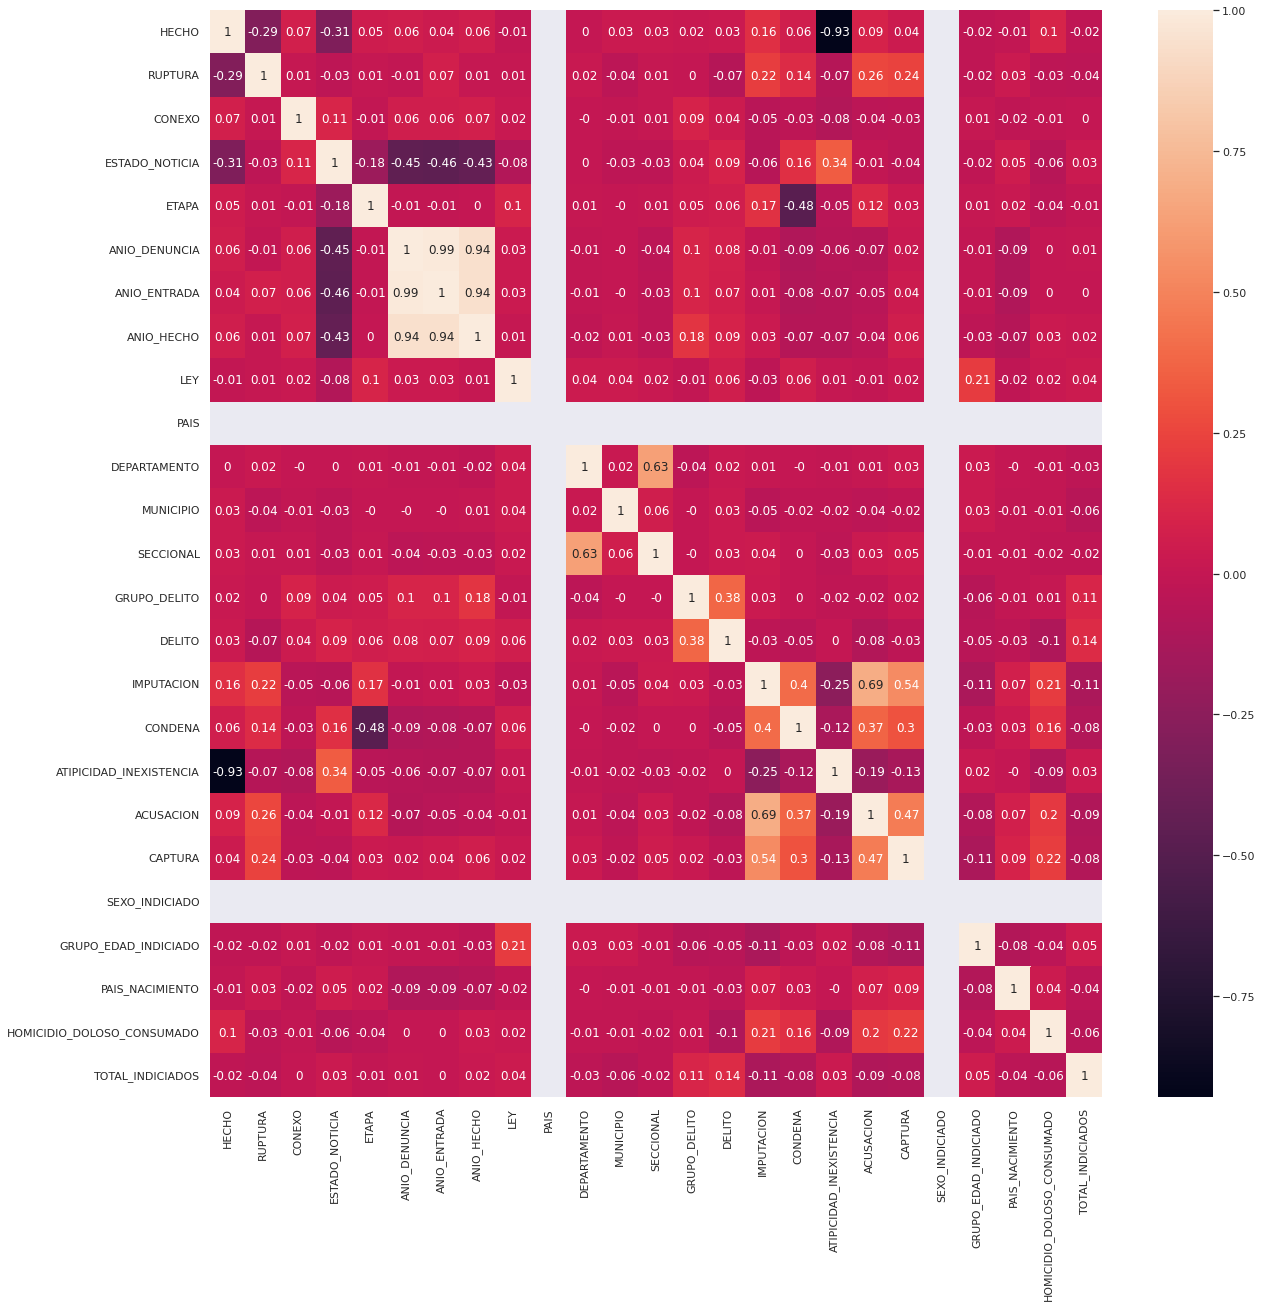

In [168]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = violencia_df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

#P3. Algoritmo de k-means (30%)

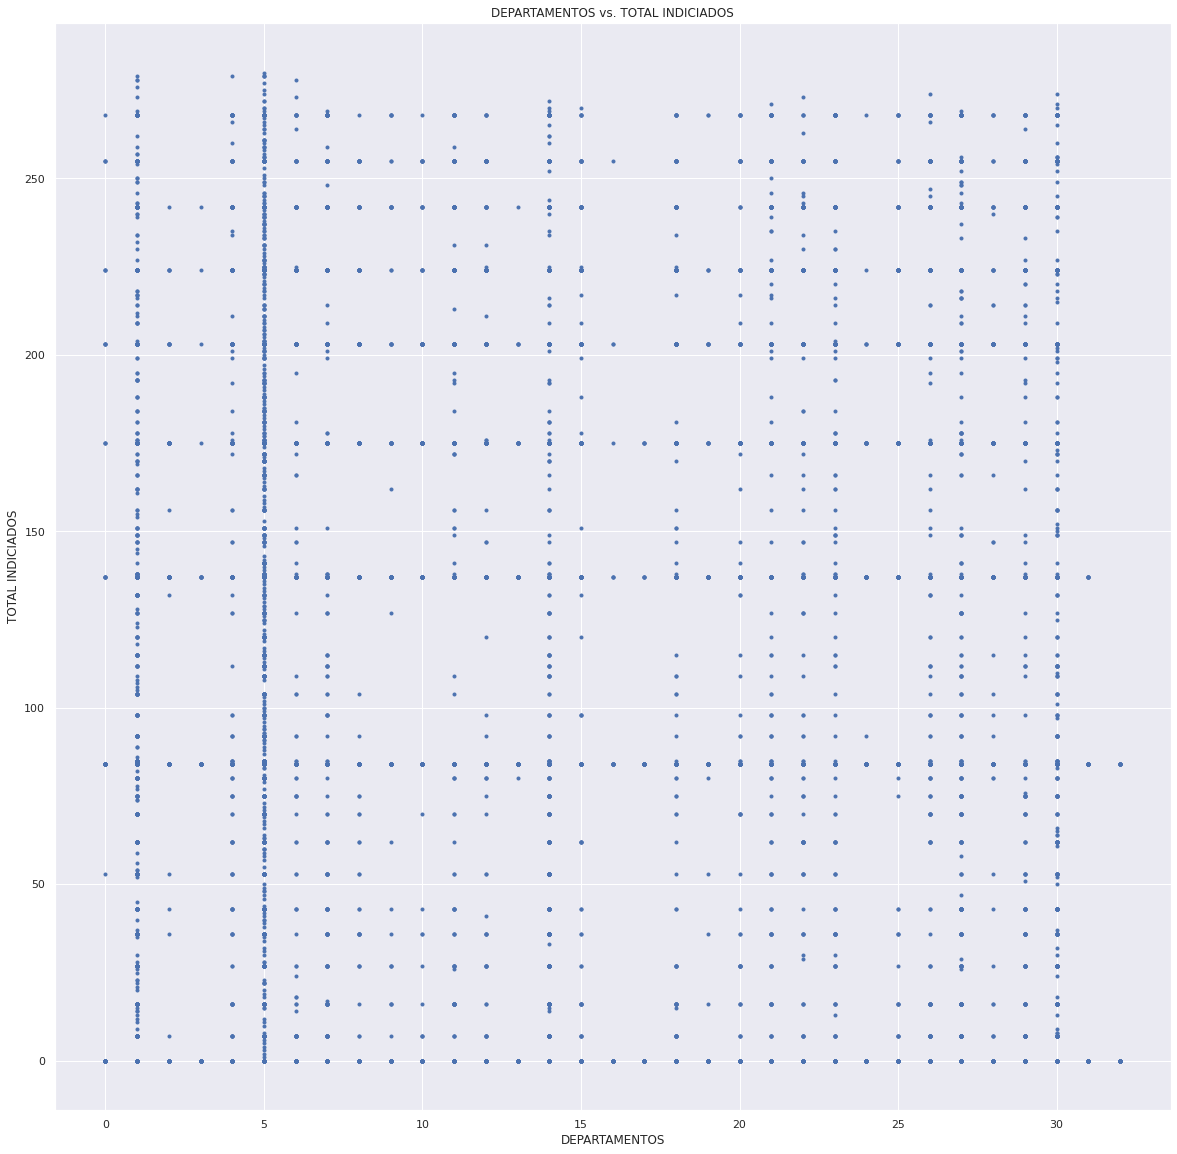

In [183]:
x = violencia_df['DEPARTAMENTO'].values
y = violencia_df['TOTAL_INDICIADOS'].values
plt.xlabel('DEPARTAMENTOS')
plt.ylabel('TOTAL INDICIADOS')
plt.title('DEPARTAMENTOS vs. TOTAL INDICIADOS')
plt.plot(x,y,'o',markersize=3)

##P3.1 gráfica elbow o de codo (20%)

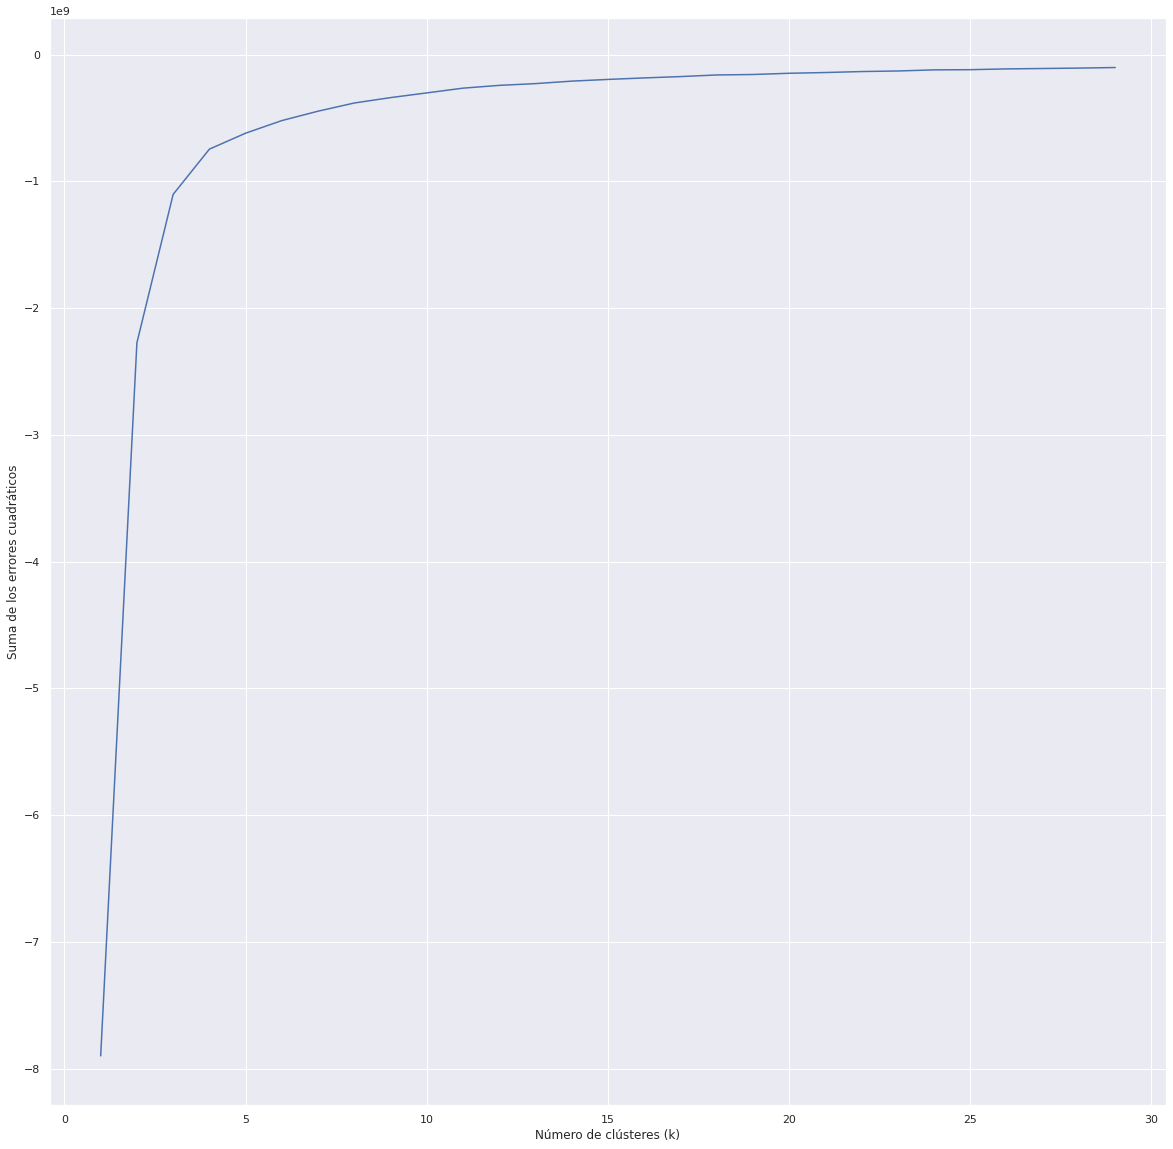

In [170]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(violencia_df).score(violencia_df) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##P3.2 buscando los centroides (30%)

In [171]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(violencia_df)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroide

[[7.35894960e-01 4.08959259e-02 2.43676385e-02 6.42633713e-01
  2.25572504e+00 2.01642398e+03 2.01647859e+03 2.01596714e+03
  2.91658621e+00 0.00000000e+00 1.41406063e+01 1.07852134e+02
  1.94463796e+01 5.88206217e+00 5.19906159e+01 2.54412049e-01
  5.88916779e-02 2.24985518e-01 1.60803244e-01 1.30488511e-01
  0.00000000e+00 4.32739911e+00 1.04613246e+01 3.67638540e-02
  4.01653215e+01]
 [7.73095895e-01 2.19881281e-02 1.73898503e-02 6.10400468e-01
  2.24905944e+00 2.01642764e+03 2.01646117e+03 2.01605309e+03
  2.95493688e+00 0.00000000e+00 1.45757044e+01 7.84824513e+02
  2.25405903e+01 5.89599532e+00 5.38316194e+01 1.95468606e-01
  4.64008026e-02 2.06002843e-01 1.12950422e-01 1.09439010e-01
  0.00000000e+00 4.60630382e+00 1.04211186e+01 3.00978179e-02
  2.62024914e+01]
 [7.52587686e-01 1.94002484e-02 2.23576034e-02 6.45886319e-01
  2.25847282e+00 2.01627799e+03 2.01630473e+03 2.01587082e+03
  2.94812799e+00 0.00000000e+00 1.79242326e+01 3.35040220e+02
  2.68311350e+01 5.85917076e+00 5.

##P3.3 Etiquetado de datos. (20%)

In [186]:
labels = kmeans.predict(violencia_escalado)   #generamos las etiquetas de cada clouster
violencia_df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

violencia_df.insert(0, 'HECHOS', dates)

In [187]:
violencia_df.head(10)

,HECHOS,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,...,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,CAPTURA,SEXO_INDICIADO,GRUPO_EDAD_INDICIADO,PAIS_NACIMIENTO,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_INDICIADOS,label
0,1,0,0,1,2,2017.0,2017.0,2017.0,3,0,...,0,0,0,0,0,7,11,0,156,0
1,0,0,0,1,2,2011.0,2011.0,2011.0,3,0,...,0,1,0,0,0,2,11,0,0,4
2,0,0,0,1,2,2016.0,2016.0,2012.0,3,0,...,0,1,0,0,0,7,11,0,80,0
3,1,0,0,1,2,2012.0,2012.0,2012.0,3,0,...,0,0,0,0,0,0,0,0,137,0
4,1,0,0,1,2,2012.0,2012.0,2012.0,3,0,...,0,0,0,0,0,1,11,0,177,0
5,1,0,0,1,2,2014.0,2014.0,2014.0,3,0,...,0,0,0,0,0,7,11,0,137,4
6,0,0,0,1,2,2017.0,2017.0,2017.0,3,0,...,0,1,0,0,0,4,11,0,0,2
7,1,0,0,1,5,2010.0,2010.0,2010.0,3,0,...,0,0,0,0,0,1,11,0,216,3
8,1,0,0,1,2,2011.0,2011.0,2011.0,3,0,...,0,0,0,0,0,1,11,0,181,1
9,1,0,0,1,2,2016.0,2016.0,2016.0,3,0,...,0,0,0,0,0,2,11,0,0,4


##P3.4 Representación gráfica de los clústeres k-means.(20%)

---
Una vez con los datos etiquetados, generar gráficamente en dos dimensiones el clustering realizado por k-means, usar dos variables


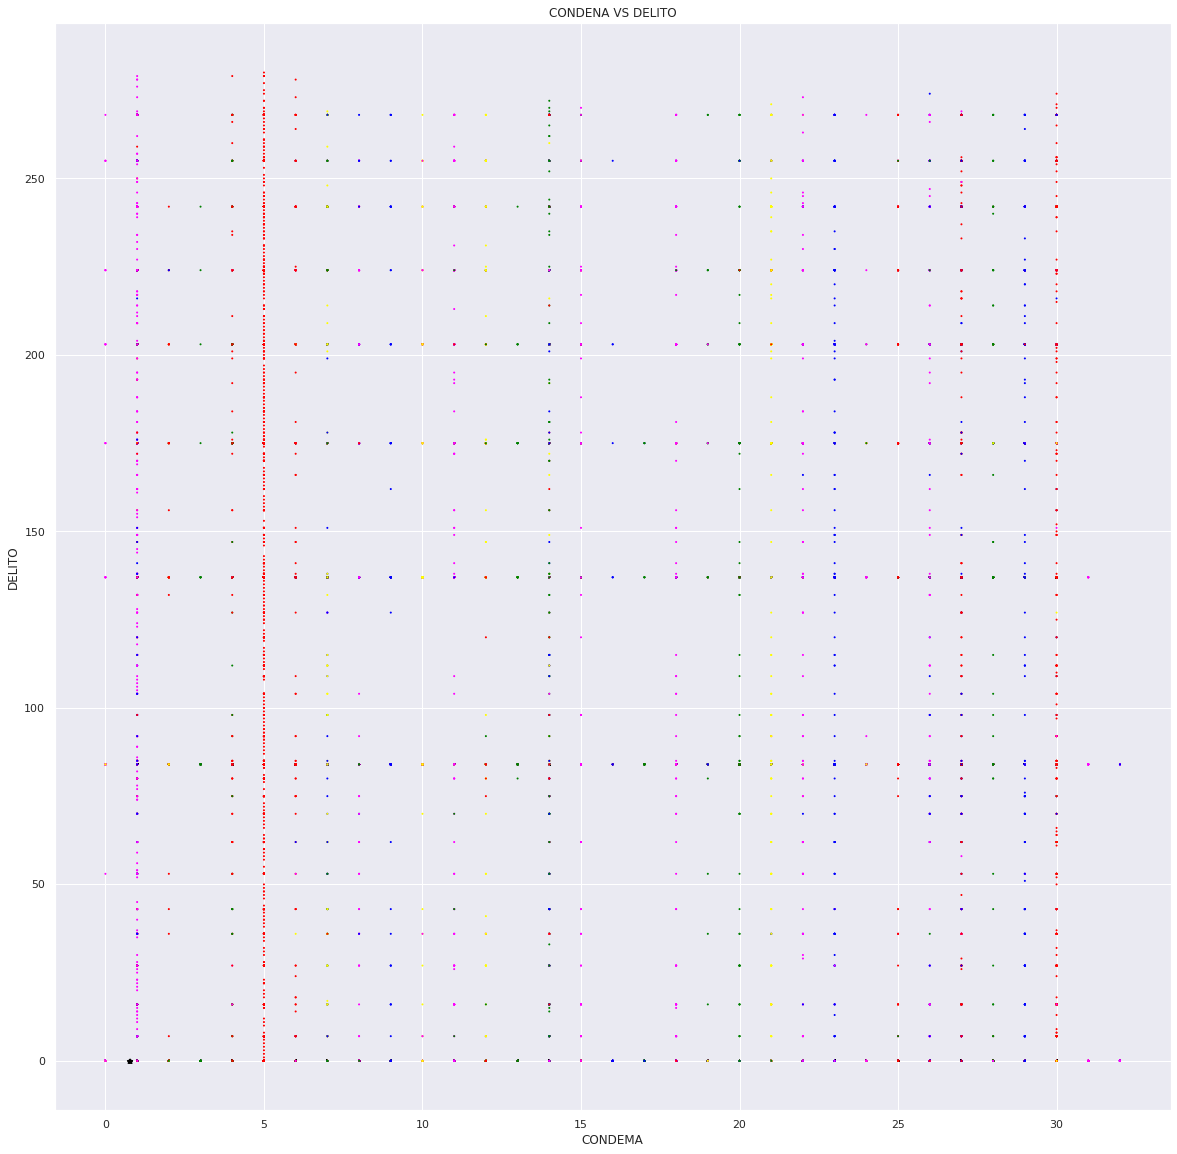

In [188]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('CONDEMA')
plt.ylabel('DELITO')
plt.title('CONDENA VS DELITO')
plt.show()

##P3.5 exportar el Dataset con los labels (10%)

#P4.algoritmo de machine Learning  (30%)

---

Seleccione un algoritmo (regresión lineal ó regresión logistica ó arboles de clasificación) que tenga la mejor inferencia

##P4.1 Preparación de los datos para el entrenamiento del modelo (10%)

##P4.2 Dividir los datos en conjuntos de entrenamiento (X %) y pruebas (X %) (30%)

##P4.3 Entrenando el modelo (20%)

##P4.4 Evaluación del modelo (40%)


##P4.5 la predicción es superior a 80%???